# Plotting an overall ROC curve

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

### Importing saved results

In [3]:
# Initializing DF to store results
res = []

# Looping through all files
print('Files that were found:')
data_file_folder = 'data/results'
for root, dirs, files in os.walk(os.path.join('..' , data_file_folder)):
    for filename in files:
        print(' - ', filename)
        df = pd.read_csv(os.path.join('..' , data_file_folder, filename), sep=',')
        res.append(df)

Files that were found:
 -  Decision Tree.csv
 -  Logistic Regression.csv
 -  Naïve Bayes.csv
 -  Neural Network.csv
 -  Random Forest.csv
 -  XGBoost.csv


### Plotting the ROC curve

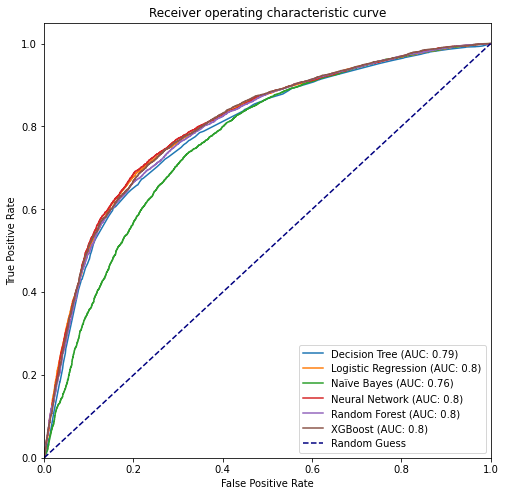

In [4]:
plt.figure(figsize=(8,8))
for df in res:
# Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(df.iloc[:,0], df.iloc[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC: {})'.format(df.columns[1], round(roc_auc, 2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower right')
plt.show()
print()

# compute and print roc_score
#roc_score  = roc_auc_score(df['y_test'], df['Logistic Regression'])
#print('ROC Score:') 
#print(roc_score)

In [5]:
def indicator(x, percent=0.5):
    if x > percent:
        return True
    else:
        return False

In [6]:
# compute and print Accuracy 
for i in range(len(res)):
    df = res[i]
    df['predictions'] = df[df.columns[1]].apply(lambda x: indicator(x))
    calc_accuracy_score = round(accuracy_score(df['y_test'], df['predictions']), 2)
    print('Accuracy Score of {}: '.format(df.columns[1]))
    print(calc_accuracy_score)
    print()

Accuracy Score of Decision Tree: 
0.73

Accuracy Score of Logistic Regression: 
0.74

Accuracy Score of Naïve Bayes: 
0.68

Accuracy Score of Neural Network: 
0.74

Accuracy Score of Random Forest: 
0.73

Accuracy Score of XGBoost: 
0.74

